In [237]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import numpy as np
import branca.colormap as cm
import folium
from folium.plugins import HeatMap
from scipy.stats import norm
import scipy.stats as st
import plotly.offline as pyo
import plotly.graph_objs as go
from collections import Counter
from geopy.distance import geodesic
import time
import xgboost as xgb
from xgboost import plot_importance

In [240]:
berlin_1 = pd.read_csv("Berlin_Regr.csv")

In [241]:
berlin_1

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,...,distance_to_Brandenburg Gate,distance_to_Reichstag,distance_to_Museum Island,distance_to_Berlin Wall Memorial,distance_to_German Historical Museum,minimum_distance,bedrooms,beds,accommodates,maximum_nights
0,Tempelhof - Schöneberg,Lichtenrade,52.357652,13.399098,Entire home/apt,88,1,0,0.00,1,...,17.709318,17.979699,17.692821,19.760683,17.813932,17.69,2,3,5,1125
1,Marzahn - Hellersdorf,Mahlsdorf,52.520060,13.659560,Entire home/apt,60,2,126,2.54,2,...,19.132845,19.235386,17.466227,18.357403,18.232241,17.47,1,2,2,100
2,Steglitz - Zehlendorf,Zehlendorf Südwest,52.412320,13.207150,Entire home/apt,36,8,29,0.63,1,...,16.378917,16.490110,17.626743,18.480940,17.132960,16.38,1,1,2,120
3,Steglitz - Zehlendorf,Drakestr.,52.402144,13.273865,Entire home/apt,120,1,0,0.00,1,...,14.531116,14.709801,15.445405,16.780038,15.120552,14.53,2,2,6,365
4,Steglitz - Zehlendorf,Drakestr.,52.410150,13.292070,Entire home/apt,110,5,1,0.03,8,...,13.166809,13.356226,14.020177,15.425668,13.723686,13.17,1,2,4,1125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16014,Treptow - Köpenick,Rahnsdorf/Hessenwinkel,52.457760,13.725400,Private room,99,1,0,0.00,4,...,24.495226,24.668618,22.904052,24.339395,23.673485,22.90,1,3,3,1125
16015,Treptow - Köpenick,Müggelheim,52.418070,13.741730,Entire home/apt,160,4,23,0.87,1,...,27.040686,27.244808,25.541632,27.206974,26.286060,25.54,2,2,4,1125
16016,Treptow - Köpenick,Rahnsdorf/Hessenwinkel,52.459650,13.725480,Private room,195,1,0,0.00,4,...,24.444932,24.616456,22.849548,24.270418,23.619888,22.85,1,4,6,1125
16017,Treptow - Köpenick,Rahnsdorf/Hessenwinkel,52.460610,13.699170,Entire home/apt,60,90,0,0.00,1,...,22.693159,22.868320,21.106374,22.562836,21.874746,21.11,1,1,2,365


## Regression Models for predicting prices

In [242]:
berlin_1

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,...,distance_to_Brandenburg Gate,distance_to_Reichstag,distance_to_Museum Island,distance_to_Berlin Wall Memorial,distance_to_German Historical Museum,minimum_distance,bedrooms,beds,accommodates,maximum_nights
0,Tempelhof - Schöneberg,Lichtenrade,52.357652,13.399098,Entire home/apt,88,1,0,0.00,1,...,17.709318,17.979699,17.692821,19.760683,17.813932,17.69,2,3,5,1125
1,Marzahn - Hellersdorf,Mahlsdorf,52.520060,13.659560,Entire home/apt,60,2,126,2.54,2,...,19.132845,19.235386,17.466227,18.357403,18.232241,17.47,1,2,2,100
2,Steglitz - Zehlendorf,Zehlendorf Südwest,52.412320,13.207150,Entire home/apt,36,8,29,0.63,1,...,16.378917,16.490110,17.626743,18.480940,17.132960,16.38,1,1,2,120
3,Steglitz - Zehlendorf,Drakestr.,52.402144,13.273865,Entire home/apt,120,1,0,0.00,1,...,14.531116,14.709801,15.445405,16.780038,15.120552,14.53,2,2,6,365
4,Steglitz - Zehlendorf,Drakestr.,52.410150,13.292070,Entire home/apt,110,5,1,0.03,8,...,13.166809,13.356226,14.020177,15.425668,13.723686,13.17,1,2,4,1125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16014,Treptow - Köpenick,Rahnsdorf/Hessenwinkel,52.457760,13.725400,Private room,99,1,0,0.00,4,...,24.495226,24.668618,22.904052,24.339395,23.673485,22.90,1,3,3,1125
16015,Treptow - Köpenick,Müggelheim,52.418070,13.741730,Entire home/apt,160,4,23,0.87,1,...,27.040686,27.244808,25.541632,27.206974,26.286060,25.54,2,2,4,1125
16016,Treptow - Köpenick,Rahnsdorf/Hessenwinkel,52.459650,13.725480,Private room,195,1,0,0.00,4,...,24.444932,24.616456,22.849548,24.270418,23.619888,22.85,1,4,6,1125
16017,Treptow - Köpenick,Rahnsdorf/Hessenwinkel,52.460610,13.699170,Entire home/apt,60,90,0,0.00,1,...,22.693159,22.868320,21.106374,22.562836,21.874746,21.11,1,1,2,365


In [243]:
features = ['minimum_nights', 'number_of_reviews',
            'calculated_host_listings_count',
            'host_identity_verified', 'instant_bookable',
            'availability_365', 'minimum_distance', 'beds', 'bedrooms', 'accommodates', 'maximum_nights']
X = berlin_1[features]
y = berlin_1['price']

In [244]:
X.isnull().sum()

minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
host_identity_verified            0
instant_bookable                  0
availability_365                  0
minimum_distance                  0
beds                              0
bedrooms                          0
accommodates                      0
maximum_nights                    0
dtype: int64

In [245]:
# # Splitting data into train and test set with 30%.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [246]:
print(X_train.shape)
print(X_test.shape)
print(len(y_train))
print(len(y_test))

(11213, 11)
(4806, 11)
11213
4806


In [247]:
# Ordinary Least Squares a.k.a OLS for Simple Linear Regression

import statsmodels.api as sm

X_train_ = sm.add_constant(X_train)

ols_model = sm.OLS(y_train, X_train_.astype(float))
res = ols_model.fit()

In [248]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     291.0
Date:                Thu, 22 Dec 2022   Prob (F-statistic):               0.00
Time:                        22:51:02   Log-Likelihood:                -60009.
No. Observations:               11213   AIC:                         1.200e+05
Df Residuals:                   11201   BIC:                         1.201e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [249]:
#The OLS results summary provides a brief description on how each feature measures with its p-value and other test scores,
# which is very useful in selecting our features for the model.

ols_model.predict(sm.add_constant(X_test).T)

array([[7.49186700e+03, 1.27547896e+06, 2.04382570e+05, ...,
        1.26686868e+06, 9.99972240e+03, 4.11054867e+05],
       [5.73824500e+03, 1.26572517e+06, 2.02609203e+05, ...,
        1.26569706e+06, 7.97516400e+03, 4.10709245e+05],
       [5.92400600e+03, 1.26703704e+06, 2.02796216e+05, ...,
        1.26582602e+06, 8.20148320e+03, 4.10716006e+05],
       ...,
       [5.72294700e+03, 1.26597970e+06, 2.06641922e+05, ...,
        1.26569564e+06, 2.68568984e+04, 4.10677947e+05],
       [2.11862500e+03, 4.11765062e+05, 6.99255750e+04, ...,
        4.10839125e+05, 2.13681000e+04, 1.33354625e+05],
       [1.90285000e+02, 2.25407925e+04, 3.67817900e+03, ...,
        2.25455450e+04, 1.93652000e+02, 7.34028500e+03]])

In [250]:
# So we decided that using OLS was not very useful with our predictions.
# We continue with a Linear Regression Model

In [251]:
# We splitted the training and testing set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [149]:
# We standardized data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [150]:
# Train the Linear Regressor model and import necessary modules

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

lr = LinearRegression(fit_intercept= False)

lr.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

In [151]:
y_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

print(f"Training Mean Squared Error: {np.sqrt(mean_squared_error(y_train, y_pred))}")
print(f"Train R2 score: {r2_score(y_train, y_pred)}")

print(f"Testing Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_test_pred))}")
print(f"Test R2 score: {r2_score(y_test, y_test_pred)}")

Training Mean Squared Error: 95.69861379358862
Train R2 score: -1.7333126253748716
Testing Mean Squared Error: 93.8634364223587
Test R2 score: -1.8092766634560897


In [152]:
# From the above model, we realized that Linear Regressor model did not perform well at all..
# In fact it has a negative R2 score which can mean that this model is performing worst.
# Next we tried Regularized Models and see if they perform any better,
# because Regularization can prevent overfitting and reduce the model complexity.

In [153]:
# Ridge Regression Model

# Ridge regression could shrink the coefficients and helps to reduce the model complexity and multi-collinearity,
# which we have seen from above OLS methods

In [154]:
# importing RidgeCV with Crossvalidation, so we could choose the best regularized alpha value

from sklearn.linear_model import RidgeCV

modelCV = RidgeCV(alphas = [0.1, 0.01, 0.05, 0.001,0.0001, 1, 2, 5, 10], store_cv_values = True)
modelCV.fit(X_train, y_train)
alpha = modelCV.alpha_
alpha

10.0

In [155]:
alpha = modelCV.alpha_
alpha

10.0

In [156]:
from sklearn.linear_model import Ridge
reg = Ridge(alpha = alpha)
reg.fit(X_train, y_train)

y_reg_pred = reg.predict(X_train)
y_reg_test_pred = reg.predict(X_test)

print(f"Training Mean Squared Error: {np.sqrt(mean_squared_error(y_reg_pred,y_train))}")
print(f"Train R2 score: {r2_score(y_reg_pred,y_train)}")

print(f"Testing Mean Squared Error: {np.sqrt(mean_squared_error(y_reg_test_pred,y_test))}")
print(f"Test R2 score: {r2_score(y_reg_test_pred, y_test)}")

Training Mean Squared Error: 51.047645191503754
Train R2 score: -2.5048900060970993
Testing Mean Squared Error: 50.653757652011684
Test R2 score: -2.474375379926369


In [157]:
# From the results, even though it did a bit better than Linear Regression model,
# it was still bad compared to the results we were expecting for a model.
# Next, we worked through another model which combines both L1 and L2 regularizations in one model called ElasticNet.

In [158]:
# ElasticNet Regression Model:
# ElasticNet Model is useful when we have more correlated variables(deals with multicollinearity issues).
# Sets the proper alpha value between 0 and 1.

# importing ElasticNet model to train the data with Cross Validation

from sklearn.linear_model import ElasticNetCV, ElasticNet

alphas = [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1]
elastic_cv=ElasticNetCV(alphas=alphas, cv=5)
model = elastic_cv.fit(X_train, y_train)
print(model.alpha_)
print(model.intercept_)

0.01
80.94666904485865


In [159]:
elastic=ElasticNet(alpha=0.01)
elastic.fit(X_train, y_train)

print(f"Training Mean Squared Error: {np.sqrt(mean_squared_error(y_train,elastic.predict(X_train)))}")
print(f"Train R2 score: {r2_score(elastic.predict(X_train), y_train)}")

print(f"Testing Mean Squared Error: {np.sqrt(mean_squared_error(y_test,elastic.predict(X_test)))}")
print(f"Test R2 score: {r2_score(elastic.predict(X_test), y_test)}")

Training Mean Squared Error: 51.047861320212604
Train R2 score: -2.5345074037331
Testing Mean Squared Error: 50.64840478940461
Test R2 score: -2.502415606801019


In [160]:
# As we saw from the R2 scores and Mean squared error,
# Elastic Net was also not very useful in determining proper price as a dependant variable.
#So, this model also performed badly. Below figure shows the original scatter points of the testing data set.

C:\Users\Alper\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\Alper\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



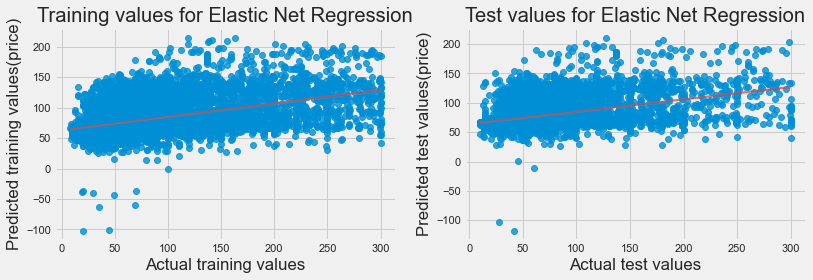

In [161]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.regplot(y_train, elastic.predict(X_train), line_kws={"color":"r","alpha":0.7,"lw":2})
plt.xlabel('Actual training values')
plt.ylabel('Predicted training values(price)')
plt.title('Training values for Elastic Net Regression')
plt.subplot(2,2,2)
sns.regplot(y_test, elastic.predict(X_test), line_kws={"color":"r","alpha":0.7,"lw":2})
plt.xlabel('Actual test values')
plt.ylabel('Predicted test values(price)')
plt.title('Test values for Elastic Net Regression')
plt.savefig('Elastic.png')
plt.show()

In [162]:
# Since, from the above linear models which we have trained the data on, did not perform well,
# which comprised of lower accuracy scores and R2 scores on training and testing set,
# we tried to move to non Linear models and check if they perform better than
# what was achieved from the comprising Linear models.

In [163]:
# Random Forest Regressor

# Since the output of the linear model like Linear and Elastic Regression performed not so well on the training
# and test data that we had (It had a negative R2_score),
# We decided to use Random Forest ensemble method which is a non linear model.
# In this, we used a Regressor, since our output contains a Regression task.
# It uses multiple decision trees and a technique called as bagging.
# This combines multiple decision trees in determining the final output,
# rather than relying on individual decision trees.

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [197]:
# Splitting data into train and test set

features = ['minimum_nights', 'number_of_reviews', 'calculated_host_listings_count',
            'host_identity_verified', 'instant_bookable',
            'availability_365', 'minimum_distance', 'beds', 'bedrooms', 'accommodates', 'maximum_nights']
X = berlin_1[features]
y = berlin_1['price']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [198]:
rfr = RandomForestRegressor(random_state=42)

In [199]:
# Here we set the parameter grid for selecting the best parameters using GridSearchCV for our RandomForestRegressor.
# It also contains cross validation within the Gridsearch on the dataset.
# This method is called hyperparameter tuning, where optimization is the key factor for selecting the best parameters.

In [200]:
param_grid = { 
    'n_estimators': [500, 700, 1000],
    'max_features': ['auto'],
    'max_depth' : [8, 10, 12],
    'min_samples_split': [5],
    'bootstrap': [True]
}

In [201]:
# We used GridSearchCV for optimal hyperparameters

CV_rfc = GridSearchCV(estimator=rfr, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, np.ravel(y_train))

C:\Users\Alper\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.

C:\Users\Alper\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.

C:\Users\Alper\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors a

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'bootstrap': [True], 'max_depth': [8, 10, 12],
                         'max_features': ['auto'], 'min_samples_split': [5],
                         'n_estimators': [500, 700, 1000]})

In [202]:
CV_rfc.best_params_

{'bootstrap': True,
 'max_depth': 12,
 'max_features': 'auto',
 'min_samples_split': 5,
 'n_estimators': 1000}

In [203]:
# We used RFR with the best parameters obtained from GridSearchCV

rfc1=RandomForestRegressor(max_features='auto', n_estimators= 500, max_depth=12, min_samples_split=5, min_samples_leaf=2, bootstrap=True, oob_score=True, random_state=42)

In [204]:
# Training the RFR model

rfc1.fit(X_train, np.ravel(y_train))

C:\Users\Alper\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



RandomForestRegressor(max_depth=12, max_features='auto', min_samples_leaf=2,
                      min_samples_split=5, n_estimators=500, oob_score=True,
                      random_state=42)

In [205]:
# We detected the Out of Bag score to estimate how much accurate our test prediction would be.

rfc1.oob_score_

0.38556016424324324

In [206]:
# Predicting the training and testing sets

y_pred = rfc1.predict(X_train)
y_test_pred = rfc1.predict(X_test)

In [207]:
from sklearn.metrics import r2_score, mean_squared_error


In [208]:
print(f"Training RMSE: {np.sqrt(mean_squared_error(y_train, y_pred))}")
print(f"Train R2 score: {r2_score(y_train, y_pred)}")

print(f"Testing RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred))}")
print(f"Test R2 score: {r2_score(y_test, y_test_pred)}")

Training RMSE: 34.90232413518588
Train R2 score: 0.6364311149974546
Testing RMSE: 45.210504021395195
Test R2 score: 0.3482510970211794


In [209]:
# From the above scores, we saw that the training score is almost 63% which the model fits very well on seen data.
# Our testing score is around 34% which does not do a pretty decent job on unseen data.
# And still there was some room for improvement like selecting some more features(feature engineering),
# tweaking a few parameters to obtain some more best results(even though not likely everytime it succeeds).

In [210]:
# we did feature importance here.
rfc1.feature_importances_

array([0.1062659 , 0.09475947, 0.12146813, 0.00659309, 0.01080432,
       0.38249275, 0.18747491, 0.0150377 , 0.01249514, 0.02118572,
       0.04142289])

In [211]:
# we extracted the numerical values of feature importance from the Random Forest Regressor
importances = rfc1.feature_importances_

# created a feature list from the original dataset (list of columns)
feature_list = list(X.columns)

# created a list of tuples
feature_importance= sorted(zip(importances, feature_list), reverse=True)

# created two lists from the previous list of tuples
df = pd.DataFrame(feature_importance, columns=['importance', 'feature'])
importance= list(df['importance'])
feature= list(df['feature'])

#see df
print(df)

    importance                         feature
0     0.382493                availability_365
1     0.187475                minimum_distance
2     0.121468  calculated_host_listings_count
3     0.106266                  minimum_nights
4     0.094759               number_of_reviews
5     0.041423                  maximum_nights
6     0.021186                    accommodates
7     0.015038                            beds
8     0.012495                        bedrooms
9     0.010804                instant_bookable
10    0.006593          host_identity_verified


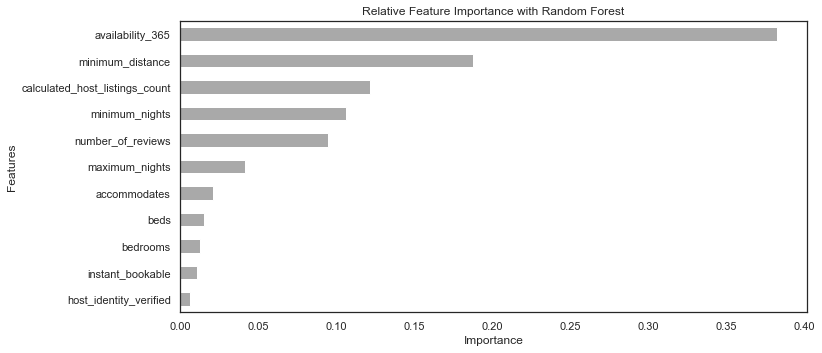

In [212]:
# we plotted the important features
feat_importances = pd.Series(rfc1.feature_importances_, index=X.columns)
feat_importances.nlargest(15).sort_values().plot(kind='barh', color='darkgrey', figsize=(10,5))
plt.title('Relative Feature Importance with Random Forest')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.savefig("importance.png")

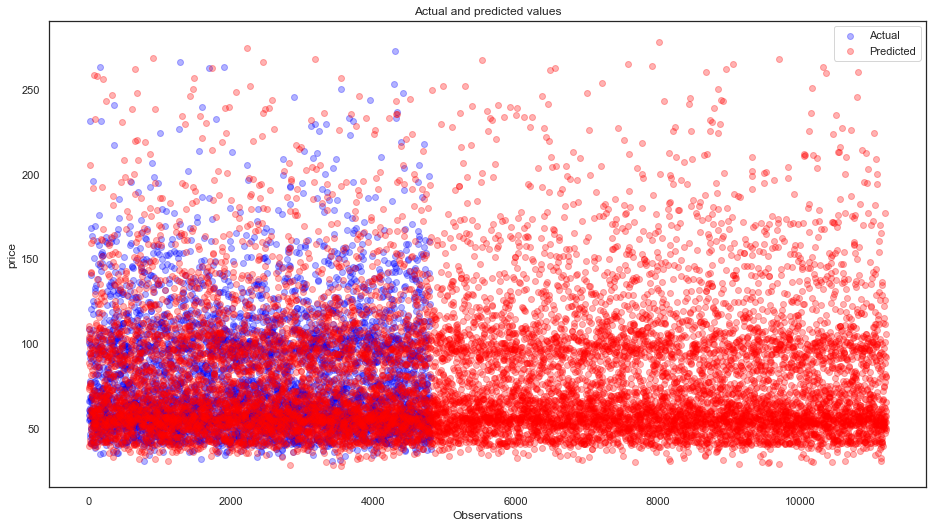

In [213]:
import matplotlib.pyplot as plt
_, ax = plt.subplots(figsize=(14, 8))

ax.scatter(x = range(0, y_test_pred.size), y=y_test_pred, c = 'blue', label = 'Actual', alpha = 0.3)
ax.scatter(x = range(0, y_pred.size), y=y_pred, c = 'red', label = 'Predicted', alpha = 0.3)

plt.title('Actual and predicted values')
plt.xlabel('Observations')
plt.ylabel('price')
plt.legend()
plt.savefig("actual_and_pred.png")
plt.show()

In [214]:
#Scatter plot of actual vs predicted output above.
# It can be seen from the plot that our model did a pretty good job
# in detecting the output of the price with regards to the features included in our model.

C:\Users\Alper\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\Alper\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



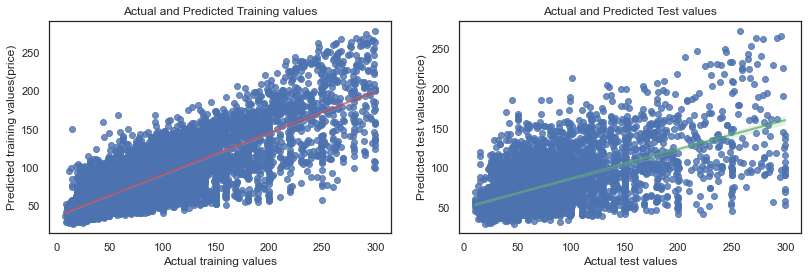

In [215]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.regplot(y_train, y_pred, line_kws={"color":"r","alpha":0.7,"lw":2})
plt.xlabel('Actual training values')
plt.ylabel('Predicted training values(price)')
plt.title('Actual and Predicted Training values')
plt.subplot(2,2,2)
sns.regplot(y_test, y_test_pred,  line_kws={"color":"g","alpha":0.7,"lw":2})
plt.xlabel('Actual test values')
plt.ylabel('Predicted test values(price)')
plt.title('Actual and Predicted Test values')
plt.show()

In [216]:
# One hot encoding for future models.
transformed_df = pd.get_dummies(berlin_1)
transformed_df.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,instant_bookable,...,neighbourhood_Wiesbadener Straße,neighbourhood_Wilhelmstadt,neighbourhood_Zehlendorf Nord,neighbourhood_Zehlendorf Südwest,neighbourhood_nördliche Luisenstadt,neighbourhood_südliche Luisenstadt,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,52.357652,13.399098,88,1,0,0.00,1,6,0,1,...,0,0,0,0,0,0,1,0,0,0
1,52.520060,13.659560,60,2,126,2.54,2,163,18,0,...,0,0,0,0,0,0,1,0,0,0
2,52.412320,13.207150,36,8,29,0.63,1,6,6,1,...,0,0,0,1,0,0,1,0,0,0
3,52.402144,13.273865,120,1,0,0.00,1,257,0,0,...,0,0,0,0,0,0,1,0,0,0
4,52.410150,13.292070,110,5,1,0.03,8,160,0,0,...,0,0,0,0,0,0,1,0,0,0


In [217]:
# A function for multi collinearity heatmap

def multi_collinearity_heatmap(df, figsize=(11,9)):
    
    """
    Creates a heatmap of correlations between features in the df. A figure size can optionally be set.
    """
    
    # Set the style of the visualization
    sns.set(style="white")

    # Create a covariance matrix
    corr = df.corr()

    # Generate a mask the size of our covariance matrix
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=figsize)

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, vmax=corr[corr != 1.0].max().max());

C:\Users\Alper\AppData\Local\Temp\ipykernel_17308\2448879120.py:16: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



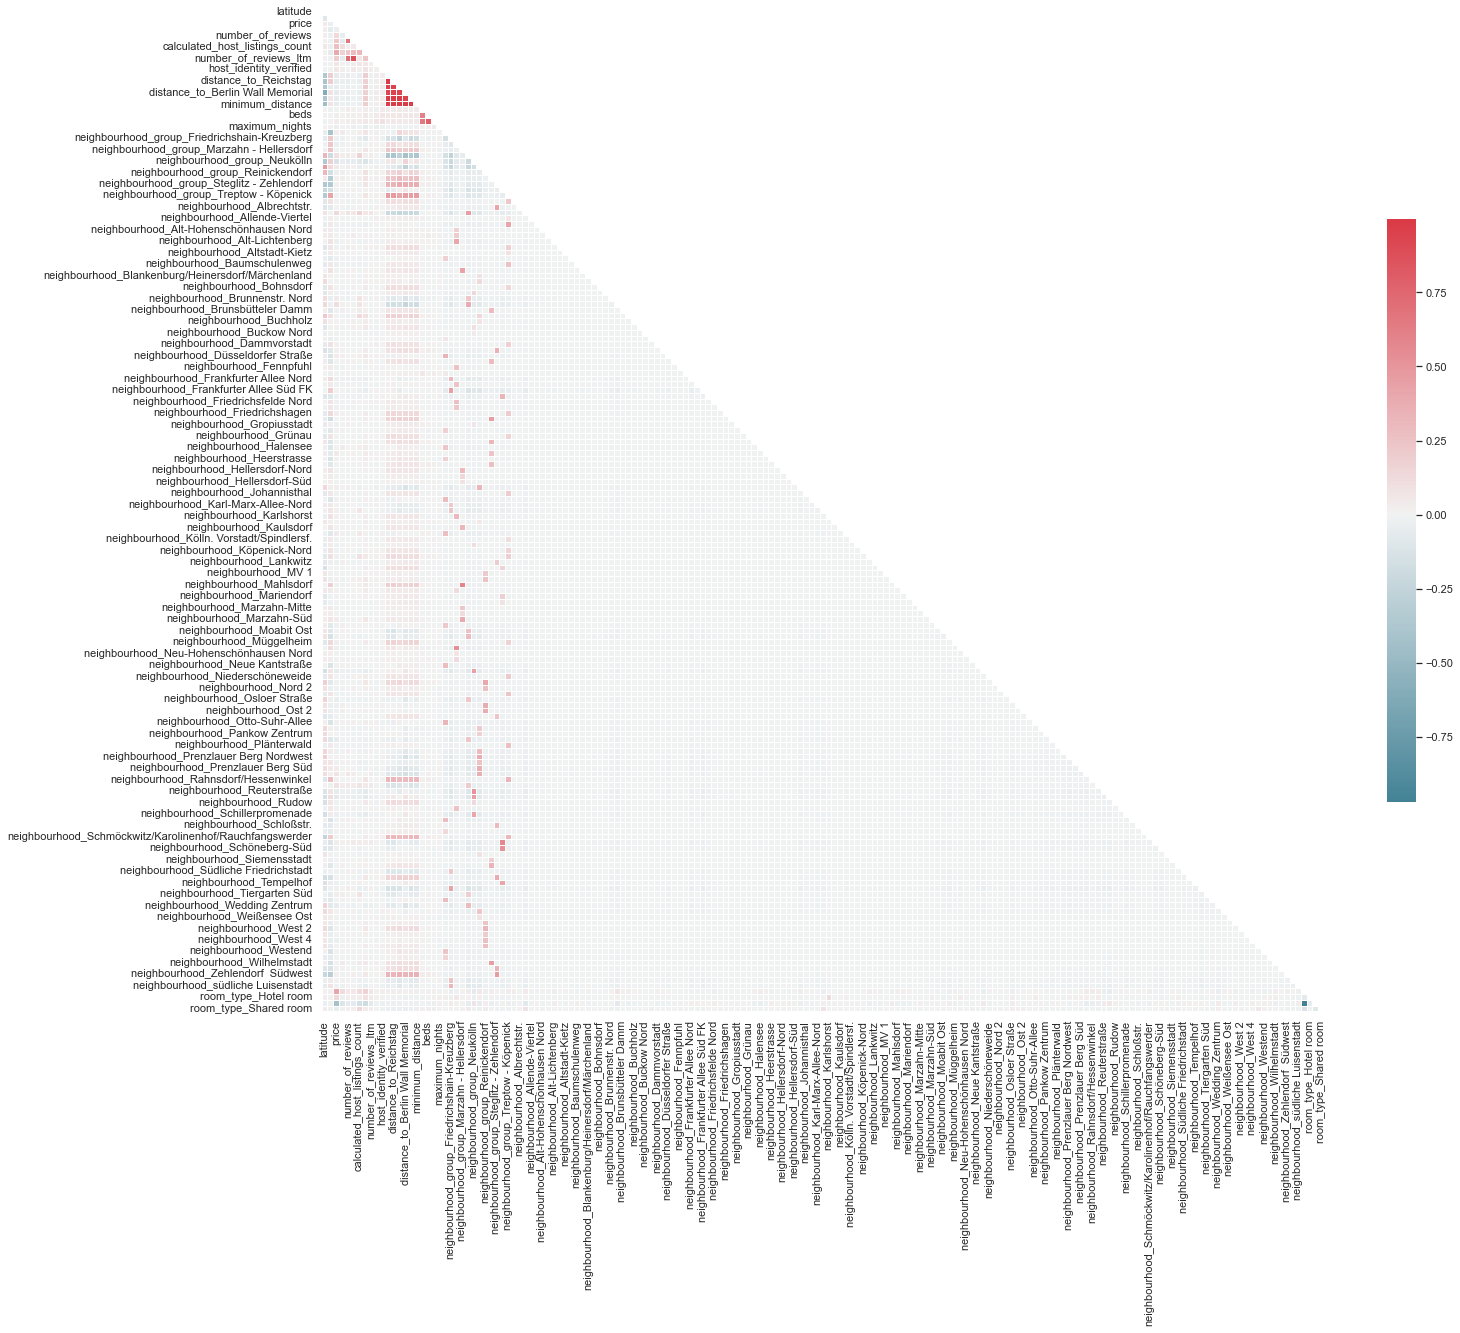

In [218]:
multi_collinearity_heatmap(transformed_df, figsize=(20,20))

In [219]:
# It didn't look like there were any significant collinear relationships with neighbourhood variables,
# so these was temporarily be dropped to produce a clearer heatmap for the remaining features:

C:\Users\Alper\AppData\Local\Temp\ipykernel_17308\2448879120.py:16: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



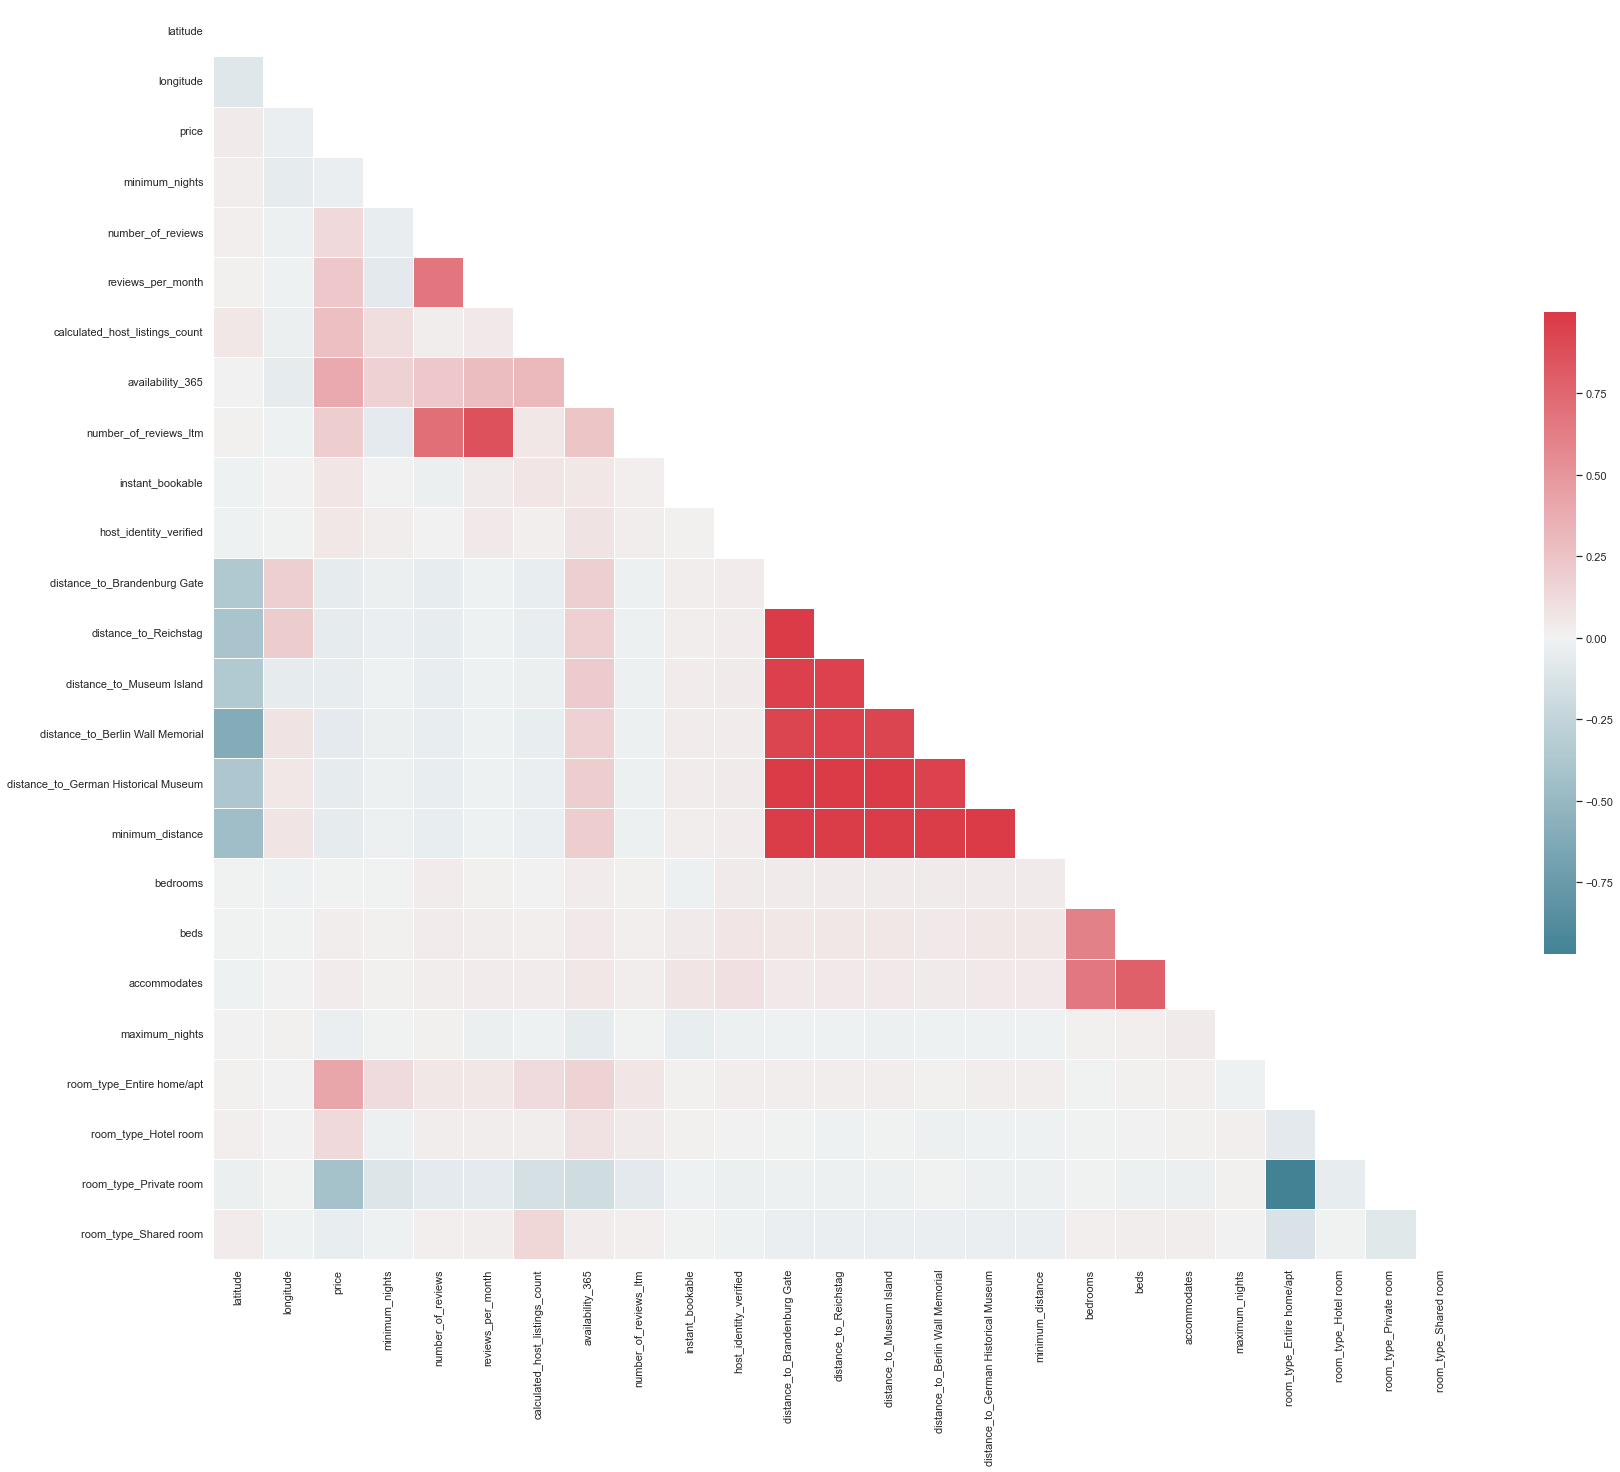

In [220]:
multi_collinearity_heatmap(transformed_df.drop(list(transformed_df.columns[transformed_df.columns.str.startswith('neighbourhood')]), axis=1), figsize=(25,22))

In [221]:
# We also dropped distance related features because of multi collinearity.

to_drop = ['distance_to_Reichstag', 'distance_to_Brandenburg Gate', 'minimum_distance', 
           'distance_to_Museum Island', 'distance_to_Berlin Wall Memorial',
           'distance_to_German Historical Museum',]
to_drop.extend(list(transformed_df.columns[transformed_df.columns.str.endswith('nan')]))


In [222]:
transformed_df.drop(to_drop, axis=1, inplace=True)

C:\Users\Alper\AppData\Local\Temp\ipykernel_17308\2448879120.py:16: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



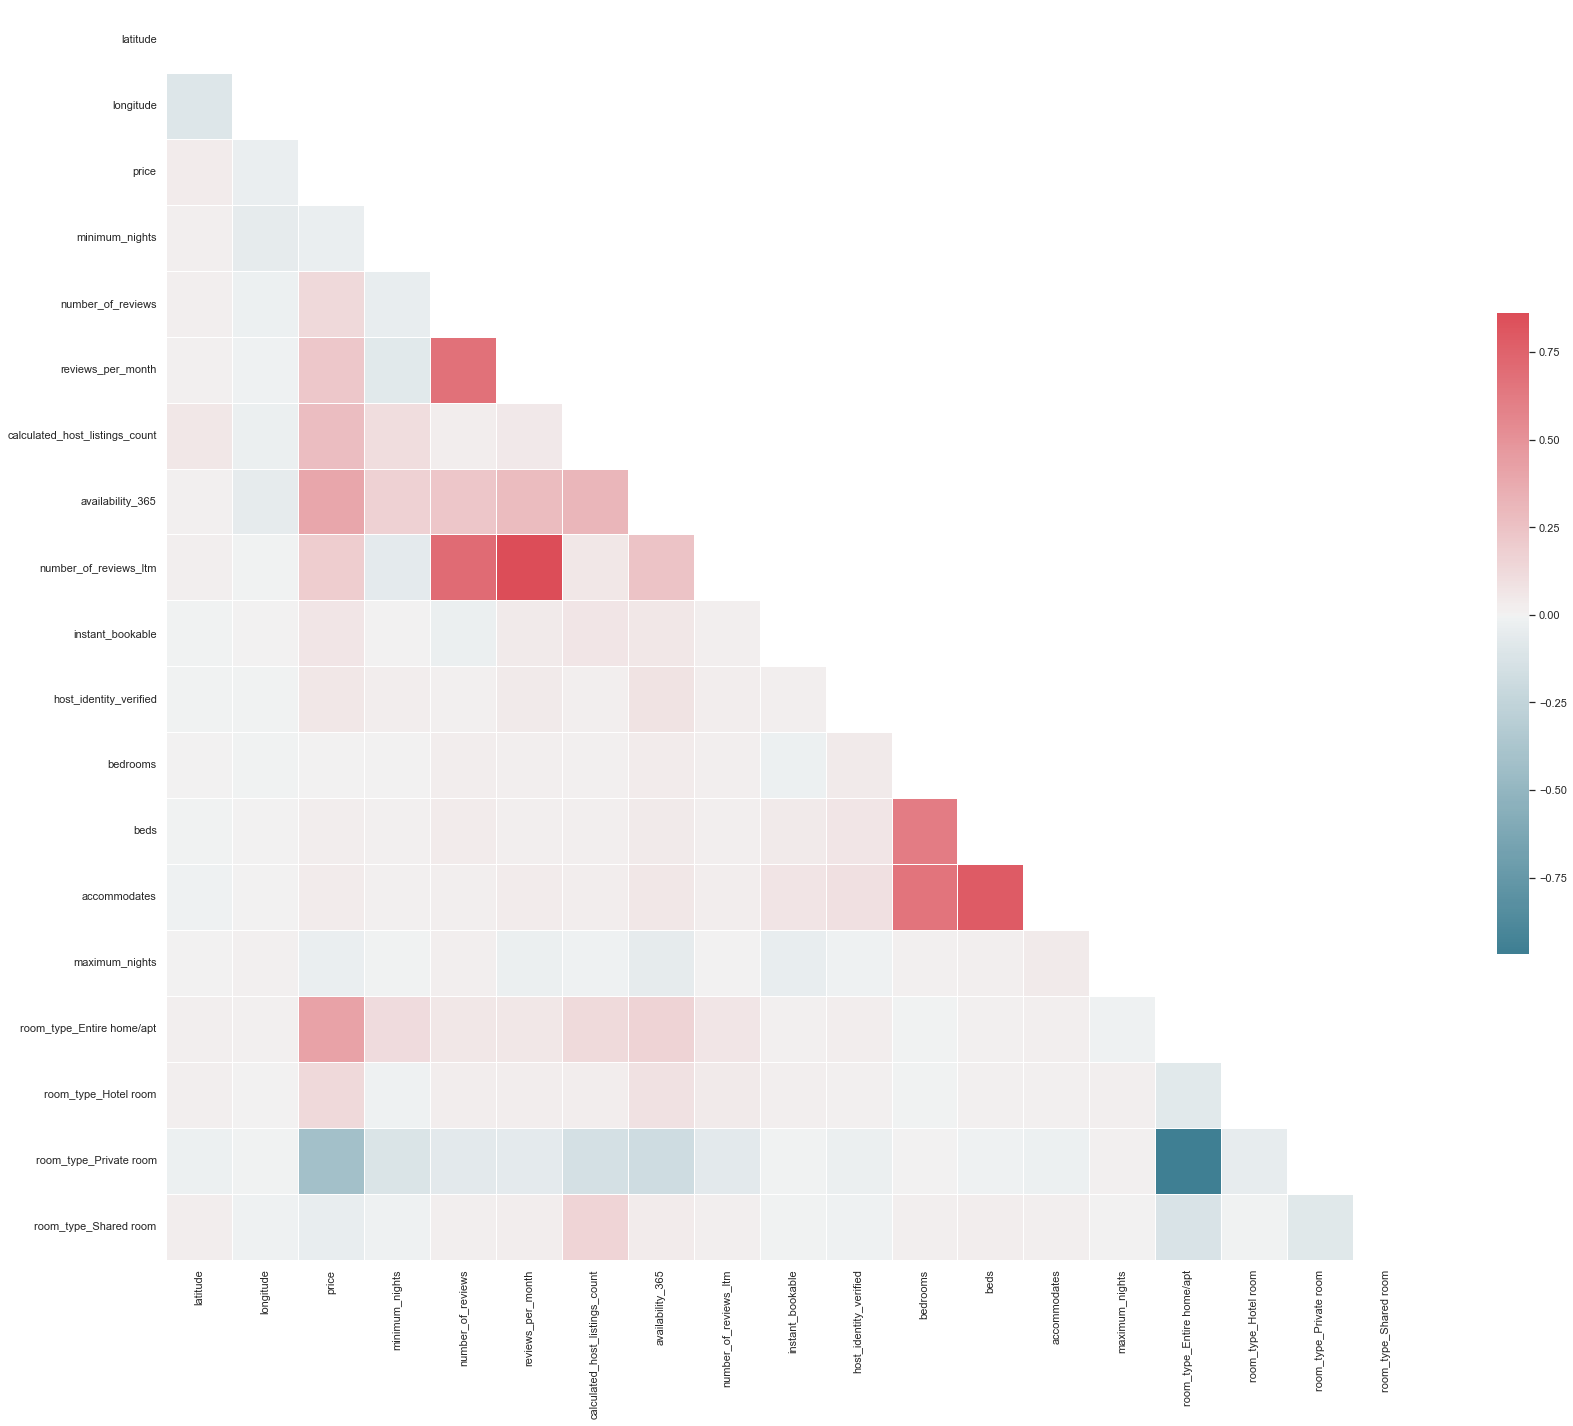

In [223]:
# Final assesment of multi collinearity:
multi_collinearity_heatmap(transformed_df.drop(list(transformed_df.columns[transformed_df.columns.str.startswith('neighbourhood')]), axis=1), figsize=(25,22))

In [224]:
# There were still some fairly strong correlations between highly rated properties of different reviews categories
# However, these would be left in for now and can be experimented with later to see if removing them improves the model.

In [252]:
# Separating X and y
X = transformed_df.drop('price', axis=1)
y = transformed_df.price

# Scaling
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=list(X.columns))

In [253]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

In [254]:
# Another Model: Gradient boosted decision trees

xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_train, y_train)
training_preds_xgb_reg = xgb_reg.predict(X_train)
val_preds_xgb_reg = xgb_reg.predict(X_test)
print("\nTraining r2:", round(r2_score(y_train, training_preds_xgb_reg),4))
print("Validation r2:", round(r2_score(y_test, val_preds_xgb_reg),4))


Training r2: 0.7768
Validation r2: 0.5149


In [232]:
# With XGBoost, our features explain approximately 77% of the variance in our target variable.